# Titulo

asdasdasd

# **Descripción del Dataset del Servidor**
Este dataset contiene información relacionada con las consultas ejecutadas en el servidor PostgreSQL, donde se evaluó el consumo energético bajo diferentes estrategias de optimización (indexación, compresión y combinaciones). A continuación, se describen las variables:


*   **query (int):** Número de la consulta del benchmark TPC-H, del 1 al 22.
*   **Iteration (int):** Número de la iteración de cada consulta (del 1 al 30), lo cual permite capturar el comportamiento energético en múltiples ejecuciones.

*   **--base Total Energy (J) (float):** Energía total consumida en joules sin aplicar ninguna optimización. Es la referencia base para comparar con las estrategias de optimización.
*   **index Total Energy (J) (float):** Energía total consumida en joules cuando se aplica solo la indexación. Esto permite evaluar el impacto energético de la indexación sobre la consulta.

*   **compression Total Energy (J) (float):** Energía total consumida en joules cuando solo se aplica la compresión de datos.
*   **index-and-compression Total Energy (J) (float):** Energía total consumida cuando se aplican simultáneamente indexación y compresión. Esta variable se utiliza para evaluar si la combinación de estrategias es más eficiente que cada una por separado.

# **Descripción del Dataset del Cliente**
El dataset del cliente recoge las métricas del consumo energético del lado del cliente durante la ejecución de las mismas consultas de TPC-H. Las variables son:


*   **query (int):** Número de la consulta del benchmark TPC-H, del 1 al 22.

*   **Iteration (int):** Número de la iteración de la consulta, capturando múltiples ejecuciones.

*   **--base Juliet Java Total Energy (J) (float):** Energía consumida en el cliente en joules sin aplicar optimización. Sirve como referencia base para comparar con las estrategias.

*   **--base Total Energy (J) (float):** Energía total base consumida en joules en el cliente sin optimización. Mide la energía base consumida por el cliente sin estrategias de optimización.
*   **--base Average Energy (J) (float):** Energía promedio consumida en joules durante las iteraciones de las consultas.
*   **--base Total Power (W) (float):** Potencia total consumida en watts sin aplicar optimización.
*   **--base Average Power (W) (float):** Potencia promedio consumida en watts durante las iteraciones.
*   **--base Runtime (int):** Tiempo de ejecución del cliente sin optimización.
*   **--base Read Count (int):** Cantidad de lecturas realizadas por el cliente durante la ejecución de la consulta.
*   **index-and-compression Total Energy (J) (float):** Energía consumida en el cliente cuando se aplican tanto indexación como compresión.
*   **index-and-compression Average Energy (J) (float):** Energía promedio consumida bajo ambas optimizaciones.
*   **index-and-compression Total Power (W) (float):** Potencia total consumida con ambas optimizaciones.
*   **index-and-compression Average Power (W) (float):** Potencia promedio consumida con ambas optimizaciones.
*   **index-and-compression Runtime (float):** Tiempo de ejecución de la consulta bajo ambas optimizaciones.
*   **index-and-compression Read Count (int):** Número de lecturas realizadas bajo indexación y compresión.
*   **index-and-compression Postgres CPU % (int):** Porcentaje de uso de CPU por el proceso PostgreSQL en el cliente bajo ambas optimizaciones.

In [2]:
# Importación genérica para análisis de datos, estadísticas y visualización
import pandas as pd  # Manipulación y análisis de datos, lectura de archivos como CSV
import numpy as np  # Operaciones numéricas y manejo de arrays
import matplotlib.pyplot as plt  # Creación de gráficos
import seaborn as sns  # Visualización de datos estadísticos

from scipy import stats  # Herramientas estadísticas avanzadas

# Configuración para mostrar gráficos directamente en el notebook (si usas Jupyter)
%matplotlib inline

Primeras filas de all-client_resume_iteration.csv:
   query  Iteration  --base Juliet Java Total Energy (J)  \
0      1          1                              21.7749   
1      1          2                              23.6804   
2      1          3                              25.1116   
3      1          4                              25.0316   
4      1          5                              20.0130   

   --base Total Energy (J)  --base Average Energy (J)  --base Total Power (W)  \
0                  13.1298                   0.273538                  0.5827   
1                  12.2016                   0.271147                  0.1727   
2                  12.9996                   0.259992                  0.4585   
3                  10.6466                   0.171719                  0.8107   
4                  12.5769                   0.292486                  0.9260   

   --base Average Power (W)  --base Runtime  --base Read Count  \
0                  0.012140     415

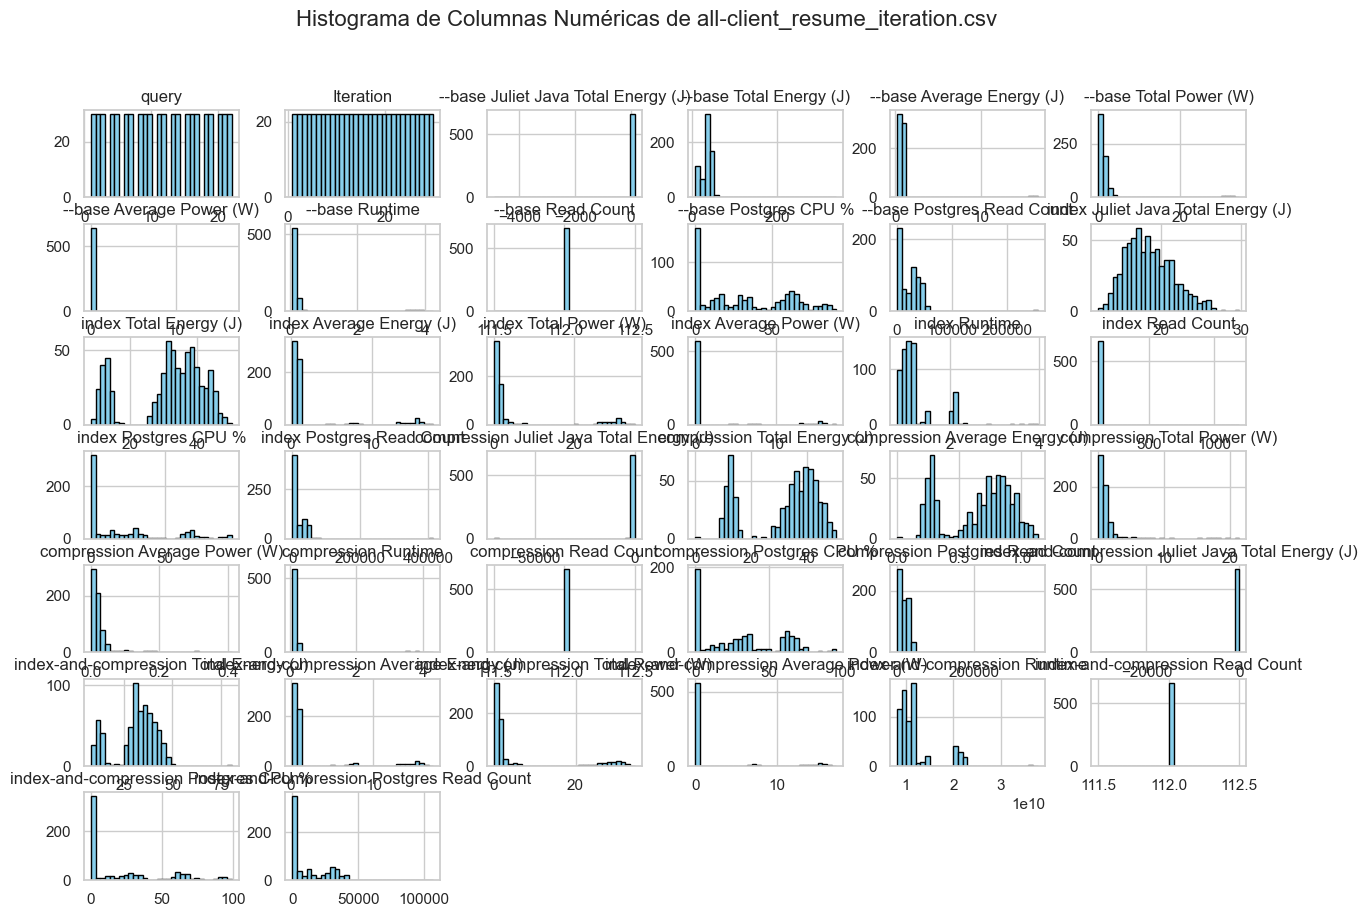

Primeras filas de all-server_resume_iteration.csv:
   query  Iteration  --base Total Energy (J)  index Total Energy (J)  \
0      1          1                  349.015                 115.379   
1      1          2                  315.747                 145.455   
2      1          3                  310.136                 133.121   
3      1          4                  316.988                 150.079   
4      1          5                  313.818                 133.309   

   compression Total Energy (J)  index-and-compression Total Energy (J)  
0                       327.515                                 134.039  
1                       313.064                                 137.243  
2                       320.986                                 133.452  
3                       312.529                                 142.548  
4                       328.398                                 129.909  

Análisis descriptivo de all-server_resume_iteration.csv:
            qu

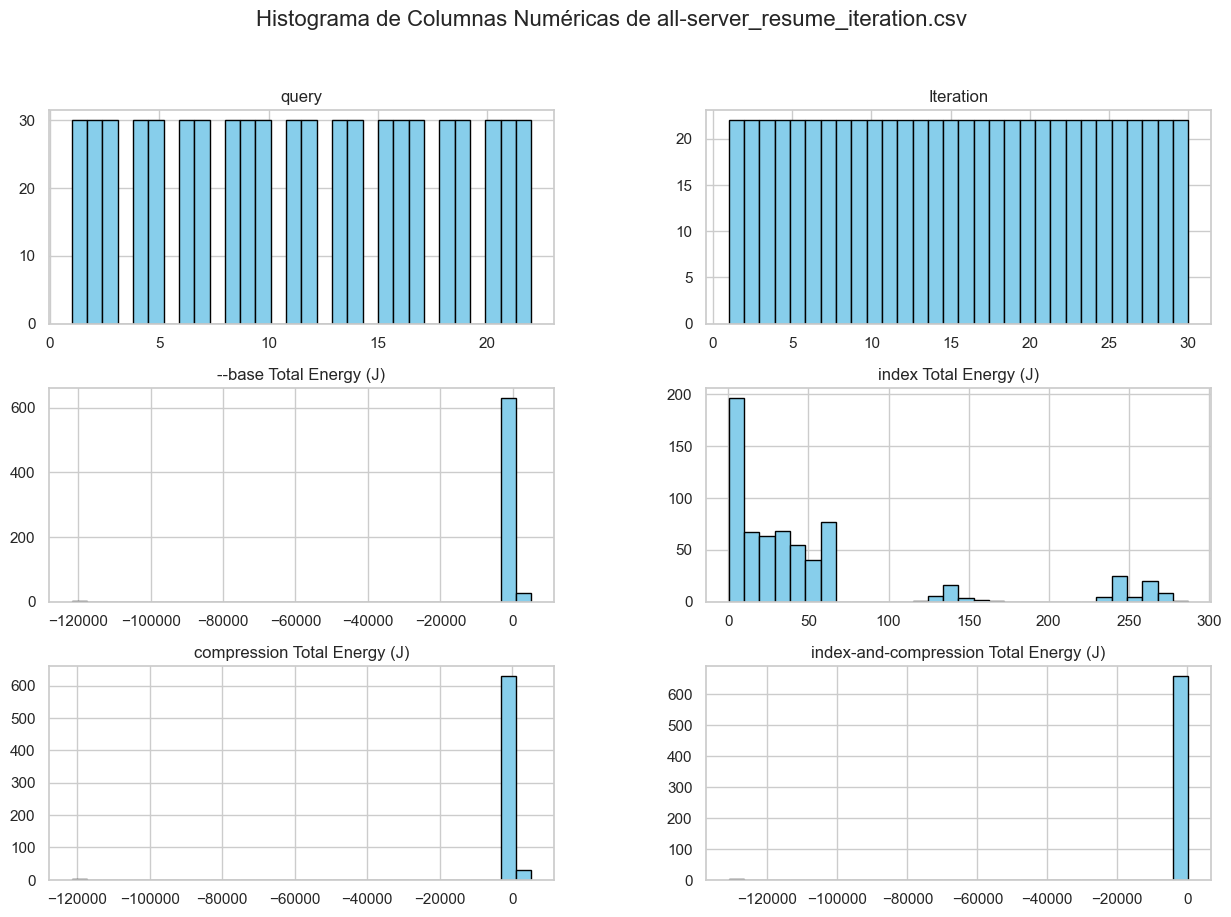

In [8]:
# Función para leer el archivo CSV
def analyze_and_plot_csv(file_path):
    # Leer el archivo CSV
    data = pd.read_csv(file_path)
    
    # Mostrar las primeras filas del archivo
    print(f"Primeras filas de {file_path}:")
    print(data.head())
    
    # Análisis descriptivo básico
    print(f"\nAnálisis descriptivo de {file_path}:")
    print(data.describe())
    
    # Verificar valores nulos
    print(f"\nValores nulos en {file_path}:")
    print(data.isnull().sum())
    
    # Graficar todas las columnas numéricas
    numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
    
    if not numeric_columns.empty:
        sns.set(style='whitegrid')
        data[numeric_columns].hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
        plt.suptitle(f'Histograma de Columnas Numéricas de {file_path}', fontsize=16)
        plt.show()
    else:
        print(f"No se encontraron columnas numéricas en {file_path} para graficar.")

# Leer y analizar ambos archivos de ejemplo
analyze_and_plot_csv('all-client_resume_iteration.csv')
analyze_and_plot_csv('all-server_resume_iteration.csv')

In [6]:
# Análisis básico para el archivo de cliente
print("\nAnálisis de datos del Cliente:")
print(client_data.describe())  # Estadísticas descriptivas
print("\nValores nulos en Cliente:")
print(client_data.isnull().sum())  # Contar valores nulos

# Análisis básico para el archivo de servidor
print("\nAnálisis de datos del Servidor:")
print(server_data.describe())  # Estadísticas descriptivas
print("\nValores nulos en Servidor:")
print(server_data.isnull().sum())  # Contar valores nulos



Análisis de datos del Cliente:
            query   Iteration  --base Juliet Java Total Energy (J)  \
count  660.000000  660.000000                           660.000000   
mean    11.500000   15.500000                            15.252841   
std      6.349101    8.662006                           215.304286   
min      1.000000    1.000000                         -4916.650000   
25%      6.000000    8.000000                            18.170550   
50%     11.500000   15.500000                            19.980600   
75%     17.000000   23.000000                            24.051675   
max     22.000000   30.000000                           134.066000   

       --base Total Energy (J)  --base Average Energy (J)  \
count               660.000000                 660.000000   
mean                 34.609981                   0.967266   
std                  16.684135                   2.049003   
min                   7.965800                   0.171719   
25%                  28.700825  

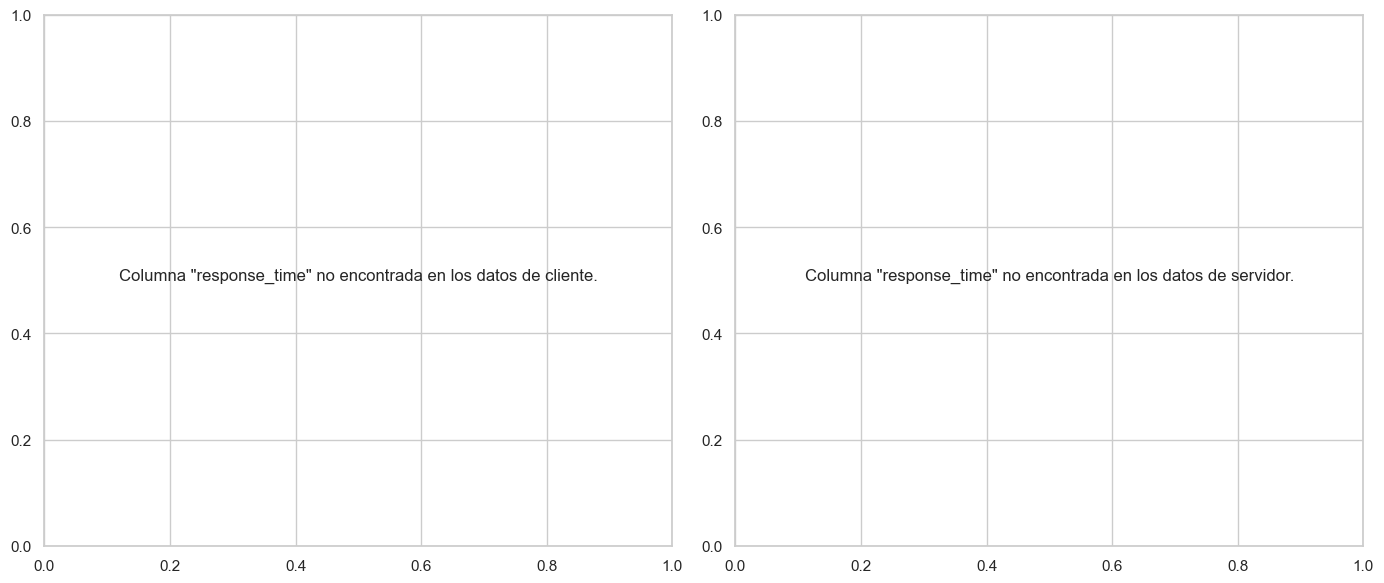

In [9]:
# Configuración del estilo de Seaborn
sns.set(style='whitegrid')

# Crear una figura con dos subgráficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Gráfico del tiempo de respuesta del cliente
if 'response_time' in client_data.columns:
    sns.histplot(client_data['response_time'], bins=30, kde=True, ax=axes[0], color='blue')
    axes[0].set_title('Distribución de Tiempo de Respuesta del Cliente')
    axes[0].set_xlabel('Tiempo de Respuesta')
    axes[0].set_ylabel('Frecuencia')
else:
    axes[0].text(0.5, 0.5, 'Columna "response_time" no encontrada en los datos de cliente.', ha='center')

# Gráfico del tiempo de respuesta del servidor
if 'response_time' in server_data.columns:
    sns.histplot(server_data['response_time'], bins=30, kde=True, ax=axes[1], color='green')
    axes[1].set_title('Distribución de Tiempo de Respuesta del Servidor')
    axes[1].set_xlabel('Tiempo de Respuesta')
    axes[1].set_ylabel('Frecuencia')
else:
    axes[1].text(0.5, 0.5, 'Columna "response_time" no encontrada en los datos de servidor.', ha='center')

# Mostrar los gráficos
plt.tight_layout()
plt.show()